In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [1]:
path = 'C:/Users/khalid/.wdm/drivers/chromedriver/win32/94.0.4606.61/chromedriver.exe'

# Insert Username and Password

In [2]:
SAMPLE_USERNAME = ""
SAMPLE_PASSWORD = ""

# Login

In [4]:
driver = webdriver.Chrome(executable_path = path)
wait = WebDriverWait(driver,10)
driver.get('https://www.instagram.com/')
time.sleep(10)
driver.maximize_window()

time.sleep(5)
## Input User name and Password
input_user = wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(SAMPLE_USERNAME)
input_password = driver.find_element_by_name('password').send_keys(SAMPLE_PASSWORD)

## Click on Login button
login = driver.find_element_by_xpath("//*[@class='sqdOP  L3NKy   y3zKF     ']").click()

## Remove 'Save Your login info' window
time.sleep(2)
not_now = wait.until(EC.presence_of_element_located((By.XPATH,"//button[@class='sqdOP yWX7d    y3zKF     'and contains(text(),'Not Now')]"))).click()

## Remove 'Turn on Notifications' window
time.sleep(2)
not_now = wait.until(EC.presence_of_element_located((By.XPATH,"//button[@class='aOOlW   HoLwm ']"))).click()


# 1. BLOGGER HABIT ANALYSIS

## 1.1 Finding top 5 handles

In [5]:
search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class='TqC_a']"))).click()

search_input = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')

time.sleep(5)

In [6]:
###########  Includes solution to 1.2 and 1.3 ###########

user_handle = []
user_follower_num = []
user_post_num = []

handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")

count = 0
for i,handle in enumerate(handles,0):
    if count==10:
        break
        
    time.sleep(3)
    handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")
    handle = handles[i]
    if handle.get_attribute('href').split('/')[-3] == 'tags':
        continue
    handle.click()
    
    time.sleep(3)
    
    #### finding handle ####
    name = wait.until(EC.presence_of_element_located((By.XPATH,"//*[@class='nZSzR']/h2"))).get_attribute('textContent')
    print(name)
    
    #### finding number of followers ####
    num = driver.find_element_by_xpath("//a[@class='-nal3 ']/span").get_attribute('title')
    num_followers = int(''.join(k for k in num if k.isdigit()))
    print('Number of Followers :',num_followers)
    
    
    #### maintaining arrays ####
    user_handle.append(name)
    user_follower_num.append(num_followers)
    
    #### finding number of posts within 3 days ####
    posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")

    count2 = 0
    for j,post in enumerate(posts,0):
        posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")
        post = posts[j]
        post.click()
    
        time.sleep(3)
        txt = wait.until(EC.presence_of_element_located((By.XPATH,"//*[@class='c-Yi7']/time"))).get_attribute('textContent') 
        print('Post',j,':',txt)
        
        if 'hour' in txt:
            count2+=1
        elif 'day' in txt:
            x = int(''.join(k for k in txt if k.isdigit()))
            if x<=3:
                count2+=1
            else:
                break
        elif 'minute' in txt:
            count2+=1
        else:
            break

        driver.back()
        time.sleep(2)
    
    time.sleep(2)
    driver.back()
    
    print('---------------------------------------------------------------------------------------------------')
    
    #### number of posts in 3 days ####
    user_post_num.append(count2)
    count+=1
    
    time.sleep(3)
    search_bar = driver.find_element_by_xpath("//span[@class='TqC_a']").click()
    search_bar = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')
    

food_bunny98
Number of Followers : 23647
Post 0 : 15 hours ago
Post 1 : 21 hours ago
Post 2 : 1 day ago
Post 3 : 1 day ago
Post 4 : 1 day ago
Post 5 : 2 days ago
Post 6 : 3 days ago
Post 7 : 4 days ago
---------------------------------------------------------------------------------------------------
food.babyy_
Number of Followers : 26694
Post 0 : 11 hours ago
Post 1 : 14 hours ago
Post 2 : 1 day ago
Post 3 : 1 day ago
Post 4 : 2 days ago
Post 5 : 3 days ago
Post 6 : 3 days ago
Post 7 : 4 days ago
---------------------------------------------------------------------------------------------------
the.food_cult
Number of Followers : 100130
Post 0 : 19 hours ago
Post 1 : 1 day ago
Post 2 : 3 days ago
Post 3 : 3 days ago
Post 4 : 3 days ago
Post 5 : 4 days ago
---------------------------------------------------------------------------------------------------
food_lunatic
Number of Followers : 122879
Post 0 : 16 hours ago
Post 1 : 18 hours ago
Post 2 : 1 day ago
Post 3 : 2 days ago
Post 4 

In [9]:
#########  Data of 10 handles  ###########

food_data = pd.DataFrame()
food_data['Name'] = user_handle
food_data['Follower_num'] = user_follower_num
food_data['Post_num'] = user_post_num

food_data = food_data.sort_values('Follower_num', ascending = False)
display(food_data)

,Name,Follower_num,Post_num
4,foodie_incarnate,834324,6
7,foodtalkindia,307112,1
5,food,149335,5
3,food_lunatic,122879,5
2,the.food_cult,100130,5
9,food.o.holic,27628,7
1,food.babyy_,26694,7
8,foodwellmcr,26218,4
0,food_bunny98,23647,7
6,foodsanyasi,20173,7


In [10]:
##########  Data of top 5 handles ##########

food_data_top5 = food_data.copy()
food_data_top5 = food_data_top5.iloc[:5]

display(food_data_top5)

,Name,Follower_num,Post_num
4,foodie_incarnate,834324,6
7,foodtalkindia,307112,1
5,food,149335,5
3,food_lunatic,122879,5
2,the.food_cult,100130,5


In [18]:
print('Top 5 handles are : ')
print()

for i in range(5):
    print(food_data_top5['Name'].iloc[i],' - ',food_data_top5['Follower_num'].iloc[i],'followers')

Top 5 handles are : 

foodie_incarnate  -  834324 followers
foodtalkindia  -  307112 followers
food  -  149335 followers
food_lunatic  -  122879 followers
the.food_cult  -  100130 followers


## 1.2 Number of posts in Last 3 days

In [16]:
print('Number of Posts of all 10 handles in last 3 days : ')
print()

for i in range(food_data.shape[0]):
    print(food_data['Name'].iloc[i],' - ',food_data['Post_num'].iloc[i],'posts')

Number of Posts of all 10 handles in last 3 days : 

foodie_incarnate  -  6 posts
foodtalkindia  -  1 posts
food  -  5 posts
food_lunatic  -  5 posts
the.food_cult  -  5 posts
food.o.holic  -  7 posts
food.babyy_  -  7 posts
foodwellmcr  -  4 posts
food_bunny98  -  7 posts
foodsanyasi  -  7 posts


In [17]:
print('Number of Posts of top 5 handles in last 3 days : ')
print()

for i in range(5):
    print(food_data_top5['Name'].iloc[i],' - ',food_data_top5['Post_num'].iloc[i],'posts')

Number of Posts of top 5 handles in last 3 days : 

foodie_incarnate  -  6 posts
foodtalkindia  -  1 posts
food  -  5 posts
food_lunatic  -  5 posts
the.food_cult  -  5 posts


## 1.3 Graphs

Graph of top 5 handles : 


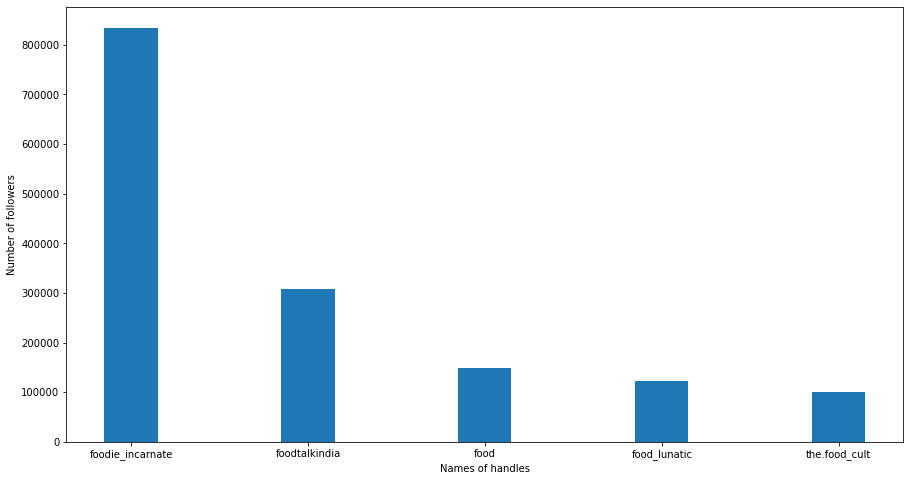

In [54]:
print('Graph of top 5 handles : ')

plt.figure(figsize=(15, 8))
plt.bar(food_data_top5['Name'],food_data_top5['Follower_num'],width=0.3)
plt.xlabel("Names of handles")
plt.ylabel("Number of followers")
plt.show()

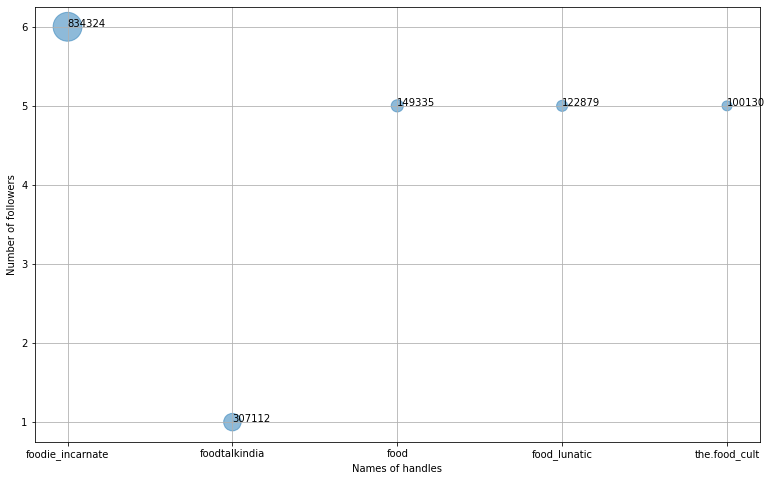

In [55]:
plt.figure(figsize=(13,8))
plt.scatter(food_data_top5['Name'],food_data_top5['Post_num'], s=food_data_top5['Follower_num']/1000, alpha = 0.5)
plt.xlabel("Names of handles")
plt.ylabel("Number of followers")

for i in range(food_data_top5.shape[0]):
    plt.text(food_data_top5['Name'].iloc[i],food_data_top5['Post_num'].iloc[i], food_data_top5['Follower_num'].iloc[i])

plt.grid()
plt.show()

Graph of all 10 handles : 


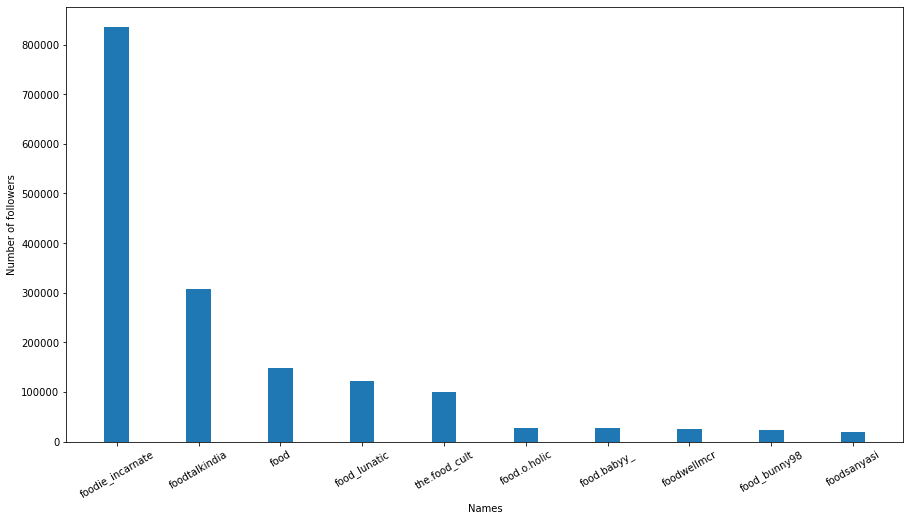

In [52]:
print('Graph of all 10 handles : ')

plt.figure(figsize=(15, 8))
plt.bar(food_data['Name'],food_data['Follower_num'],width=0.3)
plt.xlabel("Names")
plt.xticks(rotation=30)
plt.ylabel("Number of followers")
plt.show()

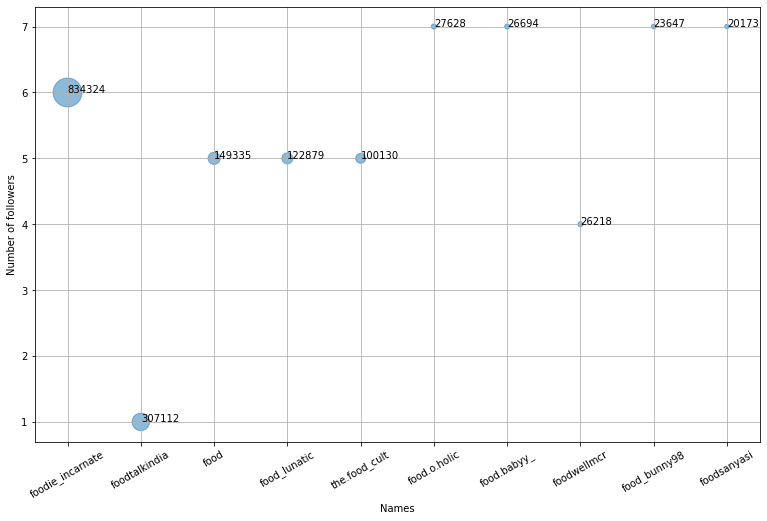

In [53]:
plt.figure(figsize=(13,8))
plt.scatter(food_data['Name'],food_data['Post_num'], s=food_data['Follower_num']/1000, alpha = 0.5)
plt.xlabel("Names")
plt.ylabel("Number of followers")
plt.xticks(rotation = 30)

for i in range(food_data.shape[0]):
    plt.text(food_data['Name'].iloc[i],food_data['Post_num'].iloc[i], food_data['Follower_num'].iloc[i])

plt.grid()
plt.show()

# 2. POPULAR HASHTAGS

## 2.1 Scrape contents of top 5 handles

In [87]:
# search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class='TqC_a']"))).click()
# search_input = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')
# time.sleep(2)
handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")

hashtags = {}
words = {}

for i in range(food_data_top5.shape[0]):
    user = food_data_top5['Name'].iloc[i]
    
    handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")
    for pos,handle in enumerate(handles,0):
        handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")
        handle = handles[pos]
        if user == handle.get_attribute('href').split('/')[-2] and 'tags' not in handle.get_attribute('href'):
            handle.click()
            
            time.sleep(3)
            
            print('Handle',i+1,':',user)
            print()
            
            posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")

            count = 0
            likes = 0
            for j,post in enumerate(posts,0):
                if count==10:
                    break
                posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")
                post = posts[j]
                post.click()
                time.sleep(3)
                
                text = wait.until(EC.presence_of_element_located((By.XPATH,"//li[@class='gElp9 rUo9f  PpGvg ']//div[@class='C4VMK']/span"))).get_attribute('textContent')
                print('Post',j+1,':')
                print(text)
                print("------------------------------------------------------------------------------------------------------------------")
                
                text_list = text.split(' ')
                for word in text_list:
                    if word in words:
                        words[word]+=1
                    else:
                        words[word]=1
                
                hashs = driver.find_elements_by_xpath("//li[@class='gElp9 rUo9f  PpGvg ']//div[@class='C4VMK']/span/a[@class=' xil3i']")
                
                for tag in hashs:
                    if tag.get_attribute('textContent') in hashtags:
                        hashtags[tag.get_attribute('textContent')]+=1
                    else:
                        hashtags[tag.get_attribute('textContent')]=1
                
                time.sleep(3)
                driver.back()
                time.sleep(3)
                count+=1
                
            search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class='TqC_a']"))).click()
            search_input = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')
            time.sleep(2)
            
            print("=========================================================================================================================")
            
            
            break
                
            
            
time.sleep(2)
driver.back()

Handle 1 : foodie_incarnate

Post 1 :
Tandoori Maggi PRO MAX🔥🔥.Watch the full video on my YouTube channel. Link is in my bio🤗🤗.#Foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #maggi #masalamaggi #streetfood #indianstreetfood
------------------------------------------------------------------------------------------------------------------
Post 2 :
North Indian ThaIi goals😍😍 Can you finish it alone??😋😋.Had it at Sugar n Spice in Ahmedabad. Priced at Rs 1249, it had like 40 dishes in it. Taste of most of the dishes was okayish but it's quantity was enough for 4 people. Worth trying once.👍🏻.#foodieincarnate #sodelhi #newdelhi #foodtalkindia #desifood #delhigram #indianfood #thali #gulabjamun #paneer #ahmedabadfood #ahmedabadfoodie #gujaratifood #biryani #manchurian #papad #lassi #paneertikka #meerutfood #mumbaifoodblogger #indianfoodblogger #delhifoodblogger #northindian #northindianfood #gujju #ahmedabadblogger #platter #indianfoodie #thingstodoinmumbai #indiancuis

Post 7 :
#HotFind #PartySnacks🤤😍Good food means happier guests mean better mingling, which makes for better parties. It’s basically science. 😉😂So here’s a list that’ll come in handy! 🙋🏻‍♀️
------------------------------------------------------------------------------------------------------------------
Post 8 :
GIVEAWAY ALERT! This giveaway is going to be a ‘Strong” one! 3 lucky ones will bring home a 6-pack of 🍺 and an owlsome collection of exciting White Owl merchandise! Gear up to enjoy your weekend with a chilled companion!All you have to do:• Follow @whiteowlbrewery 🦉• Name the 2 flavour notes in Spike 💪🏼• Tag a fellow beer lover 🍻P.S.1. Contest is open to residents of Delhi, Gurugram, Bangalore, Mumbai, Pune, Goa.2. Contest closes at midnight on Saturday, 30th October
------------------------------------------------------------------------------------------------------------------
Post 9 :
For Owl of you that hold a ‘Strong' love for beer, here’s a 🍺 that's bound to make that lov

Post 7 :
Every time I open my fridge these days!!😍.#Diwali #Diwali2021 #Sweets #Laddu #DiwaliParty #Food_Lunatic #Happiness
------------------------------------------------------------------------------------------------------------------
Post 8 :
Please note - No maggi were harmed during this process‼️.#Maggi #FeelItReelIt
------------------------------------------------------------------------------------------------------------------
Post 9 :
Creamy and cheesy white sauce pasta be my all time favourite.🤤❤️No points for guessing the location.🙈
------------------------------------------------------------------------------------------------------------------
Post 10 :
Cute short story of my life.🥲.#Reel #Reels #FeelKaroReelKaro #FeelItReelIt @diljitdosanjh
------------------------------------------------------------------------------------------------------------------
Handle 5 : the.food_cult

Post 1 :
Chai to Pehla Pyaar hai😍❤️Location - The Three Musketeers,Dehradoon...Follow us for

## 2.2 List of Words

In [88]:
for i in words:
    print(i,':',words[i],'times')
    

Tandoori : 2 times
Maggi : 1 times
PRO : 1 times
MAX🔥🔥.Watch : 1 times
the : 42 times
full : 5 times
video : 5 times
on : 16 times
my : 9 times
YouTube : 3 times
channel. : 3 times
Link : 3 times
is : 19 times
in : 21 times
bio🤗🤗.#Foodieincarnate : 2 times
#reelitfeelit : 2 times
#reelkarofeelkaro : 4 times
#reelsinstagram : 4 times
#reels : 5 times
#maggi : 1 times
#masalamaggi : 1 times
#streetfood : 15 times
#indianstreetfood : 14 times
North : 1 times
Indian : 5 times
ThaIi : 1 times
goals😍😍 : 1 times
Can : 1 times
you : 19 times
finish : 1 times
it : 6 times
alone??😋😋.Had : 1 times
at : 11 times
Sugar : 2 times
n : 1 times
Spice : 1 times
Ahmedabad. : 1 times
Priced : 1 times
Rs : 1 times
1249, : 1 times
had : 1 times
like : 2 times
40 : 1 times
dishes : 2 times
it. : 1 times
Taste : 1 times
of : 26 times
most : 2 times
was : 2 times
okayish : 1 times
but : 2 times
it's : 1 times
quantity : 1 times
enough : 1 times
for : 27 times
4 : 2 times
people. : 1 times
Worth : 1 times
tryin

cures : 1 times
guys : 1 times
swear : 1 times
by.🤪 : 1 times
#HotFind : 2 times
@balblairwhiskySay : 1 times
hello : 2 times
Balblair : 4 times
12YO, : 1 times
15YO : 1 times
18YO : 1 times
single : 2 times
malt : 2 times
Scotch : 2 times
whisky, : 1 times
an : 3 times
exciting : 2 times
new : 3 times
range : 2 times
Distillery : 1 times
- : 15 times
exclusively : 1 times
premium : 1 times
that’s : 5 times
stunning : 1 times
companion : 1 times
lovers! : 1 times
Which : 1 times
these : 3 times
would : 1 times
try : 1 times
first? : 1 times
🥃 : 2 times
A : 2 times
gem : 1 times
every : 1 times
enthusiast, : 1 times
brilliantly : 1 times
complex : 1 times
balanced : 1 times
definitely : 2 times
become : 1 times
our : 4 times
Founder, : 1 times
@shuchirsuri.@balblairwhisky : 1 times
rare : 1 times
always : 1 times
been : 1 times
driven : 1 times
idea : 1 times
being : 2 times
made : 1 times
slow : 1 times
pace : 1 times
sticking : 1 times
distillery’s : 1 times
ethos : 1 times
prioritisi

kya : 1 times
hoga?😍❤️Location : 1 times
Top : 1 times
Burger, : 1 times
Gtb : 1 times
Nagar : 1 times
Metro : 2 times
Gate : 1 times
No. : 1 times
2...Follow : 1 times
💕...........#delhifoodblogger : 1 times
Subha : 2 times
Garam : 1 times
Kachori : 1 times
Lassi😍❤️Location. : 1 times
Gopal : 1 times
Sweets,Kamla : 1 times
Nagar...Follow : 1 times
💕..........#delhifoodblogger : 1 times
#kachori : 1 times
Moonglet : 1 times
Pizza😍❤️Location : 1 times
Near : 3 times
ITO : 1 times
Metro...Use : 1 times
Potatoes : 1 times
Roasted : 1 times
Sand🔥❤️location : 1 times
Arogya : 1 times
Hospital,Chitra : 1 times
Vihar...Use : 1 times
#potato : 1 times
Handi : 1 times
Kadhi : 1 times
Chawal : 1 times
khaye : 1 times
hai : 1 times
kabhi?😍Location : 1 times
Kaushambhi : 1 times
Parking...Follow : 1 times
🥰...........#delhifoodblogger : 1 times
#exploremore : 1 times


In [89]:
word = []
frequency = []

for i in words:
    word.append(i)
    frequency.append(words[i])
    
df_words = pd.DataFrame()
df_words['Word'] = word
df_words['Frequency'] = frequency

display(df_words)



,Word,Frequency
0,Tandoori,2
1,Maggi,1
2,PRO,1
3,MAX🔥🔥.Watch,1
4,the,42
...,...,...
1126,kabhi?😍Location,1
1127,Kaushambhi,1
1128,Parking...Follow,1
1129,🥰...........#delhifoodblogger,1


## 2.3 CSV of Words

In [90]:
df_words.to_csv('Project 5 - Words.csv', sep=',' , index = False)

In [ ]:
########################## Attaching csv of both words and hashtags to avoid ambiguity ###############################

## 2.4 Common Hashtags

In [91]:
for i in hashtags:
    print(i,':',hashtags[i],'times')

#Foodieincarnate : 3 times
#reelitfeelit : 2 times
#reelkarofeelkaro : 4 times
#reelsinstagram : 4 times
#reels : 5 times
#maggi : 1 times
#masalamaggi : 1 times
#streetfood : 15 times
#indianstreetfood : 14 times
#foodieincarnate : 5 times
#sodelhi : 13 times
#newdelhi : 3 times
#foodtalkindia : 13 times
#desifood : 2 times
#delhigram : 13 times
#indianfood : 17 times
#thali : 1 times
#gulabjamun : 1 times
#paneer : 1 times
#ahmedabadfood : 1 times
#ahmedabadfoodie : 1 times
#gujaratifood : 2 times
#biryani : 1 times
#manchurian : 1 times
#papad : 1 times
#lassi : 2 times
#paneertikka : 1 times
#meerutfood : 1 times
#mumbaifoodblogger : 5 times
#indianfoodblogger : 13 times
#delhifoodblogger : 14 times
#northindian : 1 times
#northindianfood : 2 times
#gujju : 1 times
#ahmedabadblogger : 1 times
#platter : 1 times
#indianfoodie : 3 times
#thingstodoinmumbai : 1 times
#indiancuisine : 1 times
#foodgasm : 12 times
#foodporn : 12 times
#foodpornshare : 2 times
#foodlover : 2 times
#foodg

In [92]:
tags = []
frequency = []

for i in hashtags:
    tags.append(i)
    frequency.append(hashtags[i])
    
df_hashtags = pd.DataFrame()
df_hashtags['Tag_name'] = tags
df_hashtags['Frequency'] = frequency

display(df_hashtags)

,Tag_name,Frequency
0,#Foodieincarnate,3
1,#reelitfeelit,2
2,#reelkarofeelkaro,4
3,#reelsinstagram,4
4,#reels,5
...,...,...
223,#pizza,1
224,#shake,1
225,#kachori,1
226,#potato,1


### CSV Hashtags

In [93]:
df_hashtags.to_csv('Project 5 - Hashtag.csv', sep=',' , index = False)

## 2.5 Pie Chart Plot of Hashtags

In [94]:
df_hashtags_top5 = df_hashtags.copy()
df_hashtags_top5 = df_hashtags_top5.sort_values('Frequency', ascending = False)
df_hashtags_top5 = df_hashtags_top5[:5]

In [95]:
display(df_hashtags_top5)

,Tag_name,Frequency
15,#indianfood,17
7,#streetfood,15
45,#foodie,14
49,#delhifoodie,14
50,#foodblogger,14


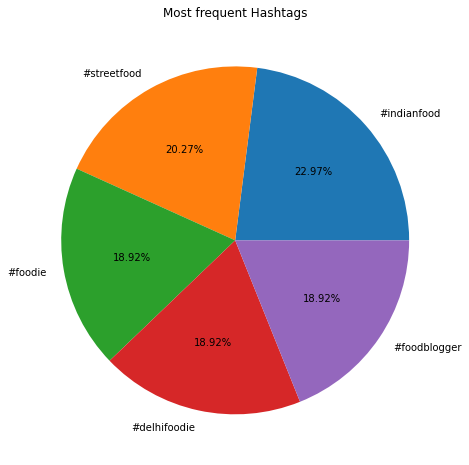

In [96]:
plt.figure(figsize=(8,8))
plt.pie(df_hashtags_top5['Frequency'], labels = df_hashtags_top5['Tag_name'], autopct = "%.2f%%")
plt.title("Most frequent Hashtags")
plt.show()

# 3. AVERAGE FOLLOWERS : LIKES RATIO

## 3.1 Find Out Likes

In [100]:
############# Includes solution to 3.2 and 3.3  ###########

search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class='TqC_a']"))).click()
search_input = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')
time.sleep(2)

handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")

average_likes = []
average_ratio = []
num_likes = []

for i in range(food_data_top5.shape[0]):
    user = food_data_top5['Name'].iloc[i]
    
    handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")
    for pos,handle in enumerate(handles,0):
        handles = driver.find_elements_by_xpath("//div[@class='fuqBx ']//a")
        handle = handles[pos]
        if user == handle.get_attribute('href').split('/')[-2] and 'tags' not in handle.get_attribute('href'):
            handle.click()
            
            time.sleep(3)
            
            print('Handle',i+1,':',user)
            print()
            
            posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")

            count = 0
            likes = 0
            for j,post in enumerate(posts,0):
                if count==10:
                    break
                posts = driver.find_elements_by_xpath("//div[@class='v1Nh3 kIKUG  _bz0w']/a")
                post = posts[j]
                post.click()
                time.sleep(3)
                
                watch = driver.find_elements_by_xpath("//section[@class='EDfFK ygqzn']//a")
                if len(watch) != 0:
                    num = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']//a//span").get_attribute('textContent')
                    num = int(''.join(k for k in num if k.isdigit()))
                    likes += num
                    print('Post',j+1,':',num,'likes')
                
                else:
                    get_likes = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']//span").click()
                    time.sleep(3)
                    num = wait.until(EC.presence_of_element_located((By.XPATH,"//section[@class='EDfFK ygqzn']/div/div/div/span"))).get_attribute('textContent')
                    num = int(''.join(k for k in num if k.isdigit()))
                    likes += num
                    print('Post',j+1,':',num,'likes')
                    
                    
                time.sleep(3)
                driver.back()
                time.sleep(3)
                count+=1
                
            #### finding avgerage likes per post ####
            
            avg_likes = likes/10
            
            #### finding ratio of followers to average likes ####
            
            avg = food_data_top5['Follower_num'].iloc[i]/avg_likes
            
            average_ratio.append(avg)
            average_likes.append(avg_likes)
            num_likes.append(likes)
                
            print('--------------------------------------------------------------------------------------------------------')
            
            search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class='TqC_a']"))).click()
            search_input = driver.find_element_by_xpath("//input[@aria-label='Search Input']").send_keys('food')
            time.sleep(2)
            
            break
            
            
time.sleep(2)
driver.back()

Handle 1 : foodie_incarnate

Post 1 : 9982 likes
Post 2 : 21998 likes
Post 3 : 36847 likes
Post 4 : 18307 likes
Post 5 : 27830 likes
Post 6 : 6731 likes
Post 7 : 7135 likes
Post 8 : 11433 likes
Post 9 : 36607 likes
Post 10 : 50908 likes
--------------------------------------------------------------------------------------------------------
Handle 2 : foodtalkindia

Post 1 : 441 likes
Post 2 : 148 likes
Post 3 : 276 likes
Post 4 : 257 likes
Post 5 : 112 likes
Post 6 : 110 likes
Post 7 : 216 likes
Post 8 : 232 likes
Post 9 : 223 likes
Post 10 : 292 likes
--------------------------------------------------------------------------------------------------------
Handle 3 : food

Post 1 : 219 likes
Post 2 : 264 likes
Post 3 : 563 likes
Post 4 : 295 likes
Post 5 : 158 likes
Post 6 : 456 likes
Post 7 : 507 likes
Post 8 : 645 likes
Post 9 : 649 likes
Post 10 : 483 likes
--------------------------------------------------------------------------------------------------------
Handle 4 : food_lunatic

In [112]:
food_data_top5['Avg_ratio'] = average_ratio
food_data_top5['Avg_likes'] = average_likes
food_data_top5['Num_likes'] = num_likes

display(food_data_top5)

,Name,Follower_num,Post_num,Avg_ratio,Avg_likes,Num_likes
4,foodie_incarnate,834324,6,36.628823,22777.8,227778
7,foodtalkindia,307112,1,1331.218032,230.7,2307
5,food,149335,5,352.288276,423.9,4239
3,food_lunatic,122879,5,30.172867,4072.5,40725
2,the.food_cult,100130,5,20.284424,4936.3,49363


## 3.2 Average Likes of Handles

In [114]:
for i in range(food_data_top5.shape[0]):
    print(food_data_top5['Name'].iloc[i],':','Average Likes =',food_data_top5['Avg_likes'].iloc[i])

foodie_incarnate : Average Likes = 22777.8
foodtalkindia : Average Likes = 230.7
food : Average Likes = 423.9
food_lunatic : Average Likes = 4072.5
the.food_cult : Average Likes = 4936.3


## 3.3 Average Follower to Like ratio

In [115]:
for i in range(food_data_top5.shape[0]):
    print(food_data_top5['Name'].iloc[i],':','Ratio =',food_data_top5['Avg_ratio'].iloc[i])

foodie_incarnate : Ratio = 36.62882280114849
foodtalkindia : Ratio = 1331.2180320762895
food : Ratio = 352.2882755366832
food_lunatic : Ratio = 30.172866789441375
the.food_cult : Ratio = 20.284423556104773


## 3.4 Graphs

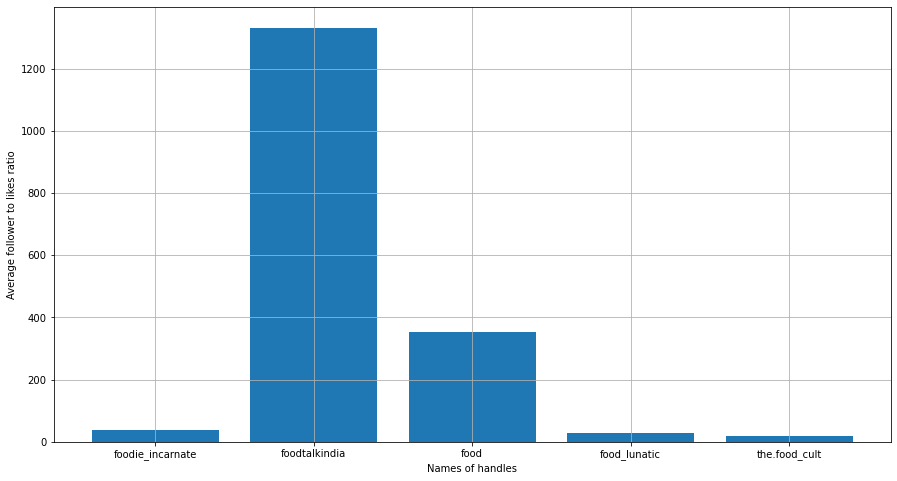

In [121]:
plt.figure(figsize=(15,8))
plt.bar(food_data_top5['Name'],food_data_top5['Avg_ratio'])
plt.xlabel("Names of handles")
plt.ylabel("Average follower to likes ratio")
plt.grid()
plt.show()